---
title: 'Fallstudie I'
date: '2024-11-25T14:25:49+01:00'
draft: true
tags: ["foo", "bar"]
format: hugo-md
---

In [11]:
import pandas as pd
from great_tables import GT
from great_tables.data import sp500
from IPython.display import display, HTML

In [12]:
#| output: asis

# Define the start and end dates for the data range
start_date = "2010-06-07"
end_date = "2010-06-14"

# Filter sp500 using Pandas to dates between `start_date` and `end_date`
sp500_mini = sp500[(sp500["date"] >= start_date) & (sp500["date"] <= end_date)]

# Create a gt table based on the `sp500_mini` table data
display(HTML(
    GT(sp500_mini)
    .tab_header(title="S&P 500", subtitle=f"{start_date} to {end_date}")
    .fmt_currency(columns=["open", "high", "low", "close"])
    .fmt_date(columns="date", date_style="wd_m_day_year")
    .fmt_number(columns="volume", compact=True)
    .cols_hide(columns="adj_close")
    .as_raw_html()
))

In [1]:
import pandas as pd
df = pd.read_pickle("SMALL_google_news_sentiment_entity.pkl")
df = df[~df['Content'].str.contains('Story Box')].reset_index(drop=True)

Button(description='Erhalte einen zufälligen Nachrichtenartikel aus Google News', style=ButtonStyle())

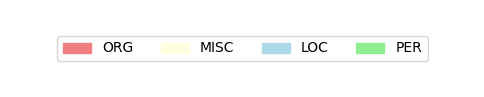

In [ ]:
import random
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

# Define colors
entity_colors = {"LOC": "lightblue","PER": "lightgreen","ORG": "lightcoral","MISC": "lightyellow"}
sentiment_colors = {"positive": "green","neutral": "grey","negative": "red"}


# Function to display a random article
def display_random_article(_):
    # Select a random row
    random_row = df.sample(n=1).iloc[0]
    title = random_row["Title_y"]
    content = random_row["Content"]
    sentiment = random_row["Sentiment"]
    entities = random_row["entities"]
    keyword = random_row["keyword"]
    url = random_row["Source_Link"]
    highlighted_content = content

    # Highlight entities with different colors
    for entity in entities:
        color = entity_colors.get(entity["entity_group"], "yellow")  # Default to yellow if not in color map
        highlighted_content = highlighted_content.replace(
            entity["word"], 
            f"<mark style='background-color: {color}'>{entity['word']}</mark>"
        )
    
    # Clear only the output area (not the button)
    clear_output(wait=True)
    display(button)  # Redisplay the button

    # Display the article
    sentiment_color = sentiment_colors.get(sentiment, "black")  # Default to black if sentiment is unknown
    display(HTML(f"""
    <h2>{title}</h2>
    <p><strong>Sentiment:</strong> <span style="color: {sentiment_color}">{sentiment}</span></p>
    <p><strong>Ursprungsquelle:</strong> <span>{url}</span></p>
    <p><strong>Google-News Suchbegriff:</strong> <span>{keyword}</span></p>
    <p>{highlighted_content}</p>
    """))
    
    # legend entity
    entity_types = set(entity["entity_group"] for entity in entities)
    legend_handles = [
        Patch(color=entity_colors[entity_type], label=entity_type) for entity_type in entity_types
    ]
    fig, ax = plt.subplots(figsize=(6, 1))
    ax.legend(handles=legend_handles, loc='center', ncol=len(entity_types))
    ax.axis("off")
    plt.show()

# Create a button widget
button = widgets.Button(description="Erhalte einen zufälligen Nachrichtenartikel aus Google News")
button.on_click(display_random_article)

# Display the button
display(button)